In [26]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [27]:
d_station_information = pd.read_json('https://gbfs.capitalbikeshare.com/gbfs/en/station_information.json')
d = pd.read_json('https://gbfs.capitalbikeshare.com/gbfs/en/station_status.json')

print('Length of d_station_information.data: ', len(d_station_information.data['stations']), '\nLength of d.data: ', len(d.data[0]))

Length of d_station_information.data:  621 
Length of d.data:  621


In [28]:
d.data[0][0]

{'is_renting': 1,
 'num_bikes_available': 8,
 'station_id': '1',
 'eightd_has_available_keys': False,
 'num_docks_disabled': 0,
 'is_returning': 1,
 'legacy_id': '1',
 'is_installed': 1,
 'station_status': 'active',
 'num_docks_available': 7,
 'num_ebikes_available': 0,
 'last_reported': 1612322618,
 'num_bikes_disabled': 0}

In [29]:
# Getting real time data about currently available (e-)bikes

av_bikes = []
av_e_bikes = []
for i in range(len(d.data[0])):
    av_bikes.append(d.data[0][i]['num_bikes_available'])
    av_e_bikes.append(d.data[0][i]['num_ebikes_available'])
print('Available Bikes: ', pd.Series(av_bikes).sum())
print('Available E-Bikes: ', pd.Series(av_e_bikes).sum())

Available Bikes:  4660
Available E-Bikes:  169


In [30]:
#d.data['stations'][0]['num_bikes_available']

In [31]:
# Check: how many stations are active?

active_station = []
for i in range(len(d.data[0])):
    active_station.append(d.data[0][i]['is_renting'])
print('Active Stations: ', pd.Series(active_station).sum())

Active Stations:  618


In [32]:
# Number of stations without (e-) bikes

print('Stations with 0 bikes available: ',av_bikes.count(0))
print('Stations with 0 e-bikes available: ',av_e_bikes.count(0))

Stations with 0 bikes available:  22
Stations with 0 e-bikes available:  502


In [33]:
# Evaluation: How many bikes and e-bikes are available at ACTIVE stations?
# (We learn that the given data for all available (e-)bikes always equals the available (e-)bikes at active stations.)

bikes_active_stations = []
e_bikes_active_stations = []
stat = []
inactive_station_id = []
for i in range(len(d.data[0])):
    if d.data[0][i]['is_renting'] == 1:
        bikes_active_stations.append(d.data[0][i]['num_bikes_available'])
        e_bikes_active_stations.append(d.data[0][i]['num_ebikes_available'])
        stat.append(d.data[0][i]['is_renting'])
    else:
        inactive_station_id.append(d.data[0][i]['station_id'])
print('Available Bikes in Active Stations: ', pd.Series(av_bikes).sum())
print('Available E-Bikes in Active Stations: ', pd.Series(av_e_bikes).sum())
print('Active Stations: ', pd.Series(stat).count())
print('Inactive Station IDs: ', inactive_station_id)

Available Bikes in Active Stations:  4660
Available E-Bikes in Active Stations:  169
Active Stations:  618
Inactive Station IDs:  ['11', '85', '486']


In [34]:
print('Number of active stations without available bikes: ', bikes_active_stations.count(0))
print('Number of active stations without available e-bikes: ', e_bikes_active_stations.count(0))

Number of active stations without available bikes:  22
Number of active stations without available e-bikes:  500


In [35]:
# Which are the stations with 0 or only 1 available (e-)bike/s?

bike_empty_stat_id = []
e_bike_empty_stat_id = []
only_one_bike_stat_id = []
only_one_e_bike_stat_id = []
for i in range(len(d.data[0])):
    if d.data[0][i]['num_bikes_available'] == 0:
        bike_empty_stat_id.append(d.data[0][i]['station_id'])
    elif d.data[0][i]['num_ebikes_available'] == 0:
        e_bike_empty_stat_id.append(d.data[0][i]['station_id'])
    elif d.data[0][i]['num_bikes_available'] == 1:
         only_one_bike_stat_id.append(d.data[0][i]['station_id'])
    elif d.data[0][i]['num_ebikes_available'] == 1:
         only_one_e_bike_stat_id.append(d.data[0][i]['station_id'])

print('Stations numbers without bikes: ', bike_empty_stat_id)
print('Stations numbers without e-bikes: ', e_bike_empty_stat_id)
print('Stations numbers with only 1 bike left: ', only_one_bike_stat_id)
print('Stations numbers with only 1 e-bike left: ', only_one_e_bike_stat_id)

Stations numbers without bikes:  ['8', '12', '17', '65', '80', '99', '134', '137', '155', '165', '208', '251', '302', '376', '397', '400', '487', '495', '533', '601', '637', '659']
Stations numbers without e-bikes:  ['1', '2', '3', '4', '5', '6', '10', '11', '13', '14', '15', '16', '19', '20', '21', '22', '23', '24', '25', '26', '27', '29', '30', '34', '35', '36', '37', '38', '40', '41', '42', '43', '44', '45', '46', '48', '49', '51', '52', '53', '55', '56', '58', '59', '60', '61', '62', '66', '67', '69', '70', '71', '72', '73', '75', '76', '77', '78', '79', '82', '83', '84', '85', '86', '87', '88', '91', '92', '93', '94', '95', '97', '98', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '113', '114', '115', '116', '117', '118', '124', '125', '126', '127', '130', '131', '132', '133', '138', '139', '140', '141', '144', '145', '146', '147', '149', '150', '153', '154', '157', '158', '160', '161', '163', '166', '167', '168', '169', '170', '172', '173', '174', '

<AxesSubplot:>

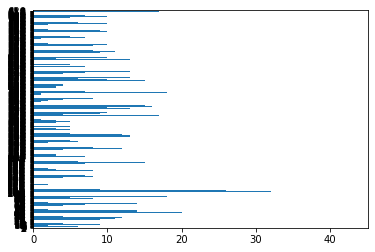

In [36]:
number_bikes = []
for i in range(len(d.data['stations'])):
    number_bikes.append(d.data['stations'][i]['num_bikes_available'])

pd.Series(number_bikes)[0:len(d.data['stations'])].plot(kind='barh')

In [37]:
fig = go.Figure(
    data=[go.Bar(y=number_bikes)],
    layout_title_text="Number of Currently Available Bikes in All Different Stations"
)
fig.update_layout(
    autosize=False,
    width=1500,
    height=500,
    margin=dict(
        l=10,
        r=10,
        b=10,
        t=100,
        pad=4
    )#,
#    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [38]:
d_station_information.data[0][0]

{'capacity': 15,
 'electric_bike_surcharge_waiver': False,
 'name': 'Eads St & 15th St S',
 'external_id': '082469cc-1f3f-11e7-bf6b-3863bb334450',
 'lat': 38.858971,
 'rental_methods': ['CREDITCARD', 'KEY'],
 'eightd_has_key_dispenser': False,
 'region_id': '41',
 'station_id': '1',
 'eightd_station_services': [],
 'lon': -77.05323,
 'short_name': '31000',
 'rental_uris': {'android': 'https://dc.lft.to/lastmile_qr_scan',
  'ios': 'https://dc.lft.to/lastmile_qr_scan'},
 'station_type': 'classic',
 'legacy_id': '1',
 'has_kiosk': True}

In [39]:
# Building map for all bike stations

all_stations = []
station_id = []
lat = []
lon = []

for i in range(len(d_station_information.data[0])):
    all_stations.append(d_station_information.data[0][i]['name'])
    station_id.append(d_station_information.data[0][i]['station_id'])
    lat.append(d_station_information.data[0][i]['lat'])
    lon.append(d_station_information.data[0][i]['lon'])

all_stations = pd.DataFrame(all_stations)
station_id = pd.DataFrame(station_id)
lat = pd.DataFrame(lat)
lon = pd.DataFrame(lon)
all_stations['station_id'] = station_id
all_stations['lat'] = lat
all_stations['lon'] = lon
all_stations.columns = ['street', 'station_id', 'lat', 'lon']

In [40]:
# All Bike Stations

fig = px.scatter_mapbox(all_stations,
                    lat='lat',
                    lon='lon',
                    hover_name="street",
                    zoom=9)
fig.update_layout(mapbox_style="open-street-map")
#fig.update_layout(title = 'All Bike Stations')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [41]:
# Getting the real station names and lat/lon for empty bike stands / stands with only 1 bike left from https://gbfs.capitalbikeshare.com/gbfs/en/station_information.json

bike_empty_stat_name = []
e_bike_empty_stat_name = []
only_one_bike_stat_name = []
eb_lat = []
eb_lon = []
oob_lat = [] # Only One Bike
oob_lon = []
e_eb_lat = []
e_eb_lon = []

for i in range(len(d_station_information.data[0])):
    for j in bike_empty_stat_id:
        j = int(j)
        if j == int(d_station_information.data[0][i]['station_id']):
            bike_empty_stat_name.append(d_station_information.data[0][i]['name'])
            eb_lat.append(d_station_information.data[0][i]['lat'])
            eb_lon.append(d_station_information.data[0][i]['lon'])

for i in range(len(d_station_information.data[0])):
    for k in only_one_bike_stat_id:
        k = int(k)
        if k == int(d_station_information.data[0][i]['station_id']):
            only_one_bike_stat_name.append(d_station_information.data[0][i]['name'])
            oob_lat.append(d_station_information.data[0][i]['lat'])
            oob_lon.append(d_station_information.data[0][i]['lon'])

for i in range(len(d_station_information.data[0])):
    for l in e_bike_empty_stat_id:
        l = int(l)
        if l == int(d_station_information.data[0][i]['station_id']):
            e_bike_empty_stat_name.append(d_station_information.data[0][i]['name'])
            e_eb_lat.append(d_station_information.data[0][i]['lat'])
            e_eb_lon.append(d_station_information.data[0][i]['lon'])

bike_empty_stat = pd.DataFrame(bike_empty_stat_name)
bike_empty_stat_id = pd.DataFrame(bike_empty_stat_id)
eb_lat = pd.DataFrame(eb_lat)
eb_lon = pd.DataFrame(eb_lon)
bike_empty_stat['station_id'] = bike_empty_stat_id
bike_empty_stat['lat'] = eb_lat
bike_empty_stat['lon'] = eb_lon
bike_empty_stat.columns = ['street', 'station_id', 'lat', 'lon']

only_one_bike_stat = pd.DataFrame(only_one_bike_stat_name)
only_one_bike_stat_id = pd.DataFrame(only_one_bike_stat_id)
oob_lat = pd.DataFrame(oob_lat)
oob_lon = pd.DataFrame(oob_lon)
only_one_bike_stat['station_id'] = only_one_bike_stat_id
only_one_bike_stat['lat'] = oob_lat
only_one_bike_stat['lon'] = oob_lon
only_one_bike_stat.columns = ['street', 'station_id', 'lat', 'lon']

e_bike_empty_stat = pd.DataFrame(e_bike_empty_stat_name)
e_bike_empty_stat_id = pd.DataFrame(e_bike_empty_stat_id)
e_eb_lat = pd.DataFrame(e_eb_lat)
e_eb_lon = pd.DataFrame(e_eb_lon)
e_bike_empty_stat['station_id'] = e_bike_empty_stat_id
e_bike_empty_stat['lat'] = e_eb_lat
e_bike_empty_stat['lon'] = e_eb_lon
e_bike_empty_stat.columns = ['street', 'station_id', 'lat', 'lon']

# print('Stations names without bikes: ', bike_empty_stat_name)
# print('Stations names without e-bikes: ', e_bike_empty_stat_name)

In [42]:
bike_empty_stat['b_type'] = 'Bike'
only_one_bike_stat['b_type'] = 'Bike'
e_bike_empty_stat['b_type'] = 'E-Bike'
empty_stations = bike_empty_stat.copy()
empty_stations = empty_stations.append(e_bike_empty_stat)
empty_stations

,street,station_id,lat,lon,b_type
0,Crystal City Metro / 18th St & S Bell St,8,38.857405,-77.051132,Bike
1,Crystal Dr & 23rd St S,12,38.853300,-77.049800,Bike
2,16th & Harvard St NW,17,38.926088,-77.036536,Bike
3,14th St Heights / 14th & Crittenden St NW,65,38.947774,-77.032818,Bike
4,Tenleytown / Wisconsin Ave & Albemarle St NW,80,38.947607,-77.079382,Bike
...,...,...,...,...,...
475,23rd St S & Hayes St,651,38.853002,-77.059496,E-Bike
476,Arlington Blvd & Fairfax Dr,653,38.886256,-77.084262,E-Bike
477,2nd & V St SW / James Creek Marina,654,38.863743,-77.013814,E-Bike
478,1st St & Potomac Ave SE,655,38.871841,-77.005910,E-Bike


In [43]:
# Empty Bike Stations (0 bikes)

fig = px.scatter_mapbox(bike_empty_stat,
                    lat='lat',
                    lon='lon',
                    hover_name="street",
                    color_discrete_sequence=['red'],
                    zoom=10)

fig.update_layout(mapbox_style="open-street-map")
#fig.update_layout(title = 'All Bike Stations')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [44]:
# Empty Bike + E-Bike Stations (0 bikes)

fig = px.scatter_mapbox(empty_stations,
                    lat='lat',
                    lon='lon',
                    hover_name="street",
                    color='b_type',
                    zoom=10)

fig.update_layout(mapbox_style="open-street-map")
#fig.update_layout(title = 'All Bike Stations')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [45]:
# Stations with 1 or 0 bikes

bike_empty_stat['available_bikes'] = '0'
only_one_bike_stat['available_bikes'] = '1'

bike_alert = bike_empty_stat.copy()
bike_alert = bike_alert.append(only_one_bike_stat)

fig = px.scatter_mapbox(bike_alert,
                    lat='lat',
                    lon='lon',
                    hover_name="street",
                    color='available_bikes',
                    zoom=9)

fig.update_layout(mapbox_style="open-street-map")
#fig.update_layout(title = 'Stations with 1 or 0 Bike/s')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()